## Kaggle kernel #10 about Boston housing price: 
- All numeric columns with encoding catogories
- Adjusting skewed distribution
- minmax scaling of all numeric features"
> https://www.kaggle.com/bturan19/a-basic-ann-implementation-with-lgbm-output/notebook

This notebook goes along with the Deep Learning using Keras tutorial on Medium.

- [Keras tutorial: regression](https://towardsdatascience.com/building-a-deep-learning-model-using-keras-1548ca149d37)

- [Regression-Classification-Keras](https://github.com/Not-A-Builder/Regression-Classification-Keras)

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical

### In this model, we are going to predict the price of houses in Boston using regression based on Keras.

### Data: imputed to be free of NaN & rescaled

In [2]:
train_df = pd.read_csv("data/train_df_munged.csv")
test_df = pd.read_csv("data/test_df_munged.csv")
label_df = pd.read_csv("data/label_df.csv")
train_df.shape,test_df.shape,label_df.shape

((1456, 403), (1459, 403), (1456, 1))

In [3]:
# Make test data using continuous values without categorical labels.
train_df.select_dtypes(include=[np.number]).shape
# All columns are numerical!

(1456, 403)

In [4]:
train_df.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,...,_YearBuiltBin_YearBin7,_YearRemodAddBin_YearBin4,_YearRemodAddBin_YearBin5,_YearRemodAddBin_YearBin6,_YearRemodAddBin_YearBin7,_NeighborhoodBin_0,_NeighborhoodBin_1,_NeighborhoodBin_2,_NeighborhoodBin_3,_NeighborhoodBin_4
0,-0.076848,-0.127817,1.209296,0.625446,-0.355892,-0.339062,-0.472456,-0.805990,1.185669,0.548227,...,1,0,0,0,1,0,0,1,0,0
1,0.562906,0.120797,-0.805439,1.257846,-0.355892,0.003303,0.512947,0.433256,-0.867410,-0.378408,...,0,0,0,1,0,0,0,0,1,0
2,0.062014,0.429834,1.137048,0.113946,-0.355892,0.231214,-0.317122,-0.575842,1.189908,0.680880,...,1,0,0,0,1,0,0,1,0,0
3,-0.322950,0.110623,-0.805439,-0.513805,-0.355892,0.348751,-0.715166,-0.436663,1.148647,0.560689,...,0,0,1,0,0,0,0,0,1,0
4,0.713484,0.891805,1.429555,0.506871,-0.355892,0.296484,0.228976,0.122612,1.249303,1.314119,...,1,0,0,0,1,0,0,0,0,1


In [5]:
label_df.head()  # logarithmic value

,SalePrice
0,12.247694
1,12.109011
2,12.317167
3,11.849398
4,12.429216


In [137]:
np.exp(label_df).head()  # original value

,SalePrice
0,208500.0
1,181500.0
2,223500.0
3,140000.0
4,250000.0


In [138]:
# Preprocession-1
# # Additional processing: scale the data.   
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(train_df_munged[numeric_features])

# scaled = scaler.transform(train_df_munged[numeric_features])
# for i, col in enumerate(numeric_features):
#     train_df_munged[col] = scaled[:, i]

# scaled = scaler.transform(test_df_munged[numeric_features])
# for i, col in enumerate(numeric_features):
#     test_df_munged[col] = scaled[:, i]

In [ ]:
# Preprocession-2
# # # Normalization of input data
# from sklearn.preprocessing import StandardScaler
# sc_y = StandardScaler()
# sc_X = StandardScaler()

# input_X=sc_X.fit_transform(train_df.astype('float64'))
# input_y=sc_y.fit_transform(label_df.astype('float64'))
# test_X = sc_X.transform(test_df.astype('float64'))
# input_X.shape, input_y.shape, test_X.shape

In [6]:
# Preprocession-3
# # Normalization of input data
from sklearn.preprocessing import minmax_scale
# scaling X to min~max '0~1' range

input_X = minmax_scale(train_df, axis=0, copy=True)
input_y = minmax_scale(label_df, axis=0, copy=True)
test_X = minmax_scale(test_df, axis=0, copy=True)
input_X.shape, input_y.shape, test_X.shape
# 출처: http://rfriend.tistory.com/270 [R, Python 분석과 프로그래밍 (by R Friend)]

# from sklearn.preprocessing import StandardScaler
# sc_y = StandardScaler()
# sc_X = StandardScaler()

# input_X=sc_X.fit_transform(train_df.astype('float64'))
# input_y=sc_y.fit_transform(label_df.astype('float64'))
# test_X = sc_X.transform(test_df.astype('float64'))
# input_X.shape, input_y.shape, test_X.shape

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64.
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64.
  


((1456, 403), (1456, 1), (1459, 403))

In [7]:
input_X[:10,:5]

array([[0.41326841, 0.36627136, 0.71603808, 0.3226691 , 0.        ],
       [0.49030656, 0.39124518, 0.        , 0.44698355, 0.        ],
       [0.42998996, 0.42228857, 0.69036125, 0.22212066, 0.        ],
       [0.38363316, 0.39022311, 0.        , 0.09872029, 0.        ],
       [0.50843889, 0.46869449, 0.79431844, 0.29936015, 0.        ],
       [0.51283863, 0.46669403, 0.        , 0.3345521 , 0.        ],
       [0.46633838, 0.40087237, 0.70897758, 0.62568556, 0.        ],
       [0.49030656, 0.40657264, 0.74336022, 0.39259598, 0.47920909],
       [0.32358459, 0.30313151, 0.        , 0.        , 0.        ],
       [0.31628003, 0.34083   , 0.        , 0.38893967, 0.        ]])

In [8]:
input_y[:5],label_df[:5]

(array([[0.61951062],
        [0.57144454],
        [0.64358896],
        [0.48146554],
        [0.68242404]]),    SalePrice
 0  12.247694
 1  12.109011
 2  12.317167
 3  11.849398
 4  12.429216)

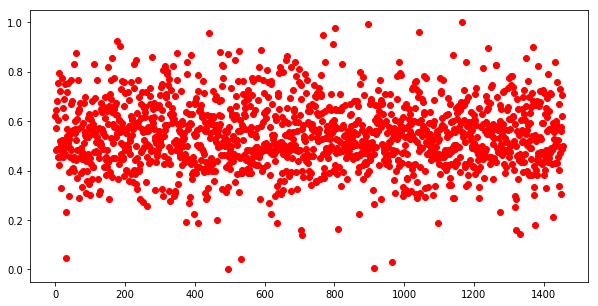

In [15]:
plt.figure(figsize=(10,5))
plt.plot(input_y,'ro')

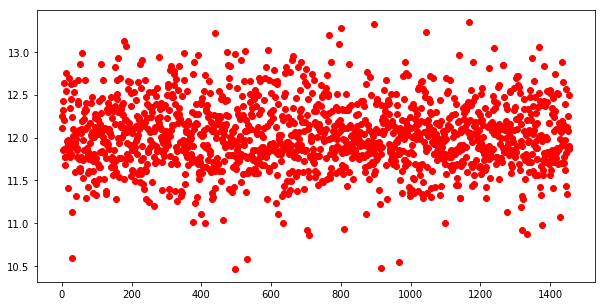

In [16]:
plt.figure(figsize=(10,5))
plt.plot(label_df,'ro')

In [17]:
#-----------------------------------------------------------------_______------------
# Define custom loss functions for regression in Keras 
#
# The functions below are Keras backend tensor functions 
# and can be used for Keras loss functions, Keras metrics and Keras learning curves. 
#------------------------------------------------------------------_______-----------
# https://github.com/keras-team/keras/issues/7947

# root mean squared error (rmse) for regression (only for Keras tensors)
def rmse(y_true, y_pred):
    from keras import backend
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

# mean squared error (mse) for regression  (only for Keras tensors)
def mse(y_true, y_pred):
    from keras import backend
    return backend.mean(backend.square(y_pred - y_true), axis=-1)

# coefficient of determination (R^2) for regression  (only for Keras tensors)
def r_square(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

def r_square_loss(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return 1 - ( 1 - SS_res/(SS_tot + K.epsilon()))


# New try
## Using the imputed data
- All columns become numeric ones.
- Skewed data were adjusted by taking logarithm.
- All columns were normalized using StandardScaler;minmax.

### Performance of model_s and model_b

> Split dataframe into the train and test set

In [20]:
data_X=input_X
data_y=label_df  #input_y or label_df   # input_y 와의 차이는???
data_X.shape, data_y.shape

((1456, 403), (1456, 1))

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1092, 403), (364, 403), (1092, 1), (364, 1))

In [22]:
y_train[:5],y_test[:5]  # randomly selected!

(      SalePrice
 846   12.388394
 802   11.678440
 1380  11.561716
 1346  12.206073
 485   11.898188,       SalePrice
 497   12.122691
 1261  12.106252
 411   11.884489
 1046  11.652687
 1033  11.338572)

### small model: model_s1

In [24]:
# create simple model in Keras
model_s1 = Sequential()  # simple model

#get number of columns in training data
n_cols = X_train.shape[1]
print(n_cols)
#add layers to model
model_s1.add(Dense(10, activation='relu', input_shape=(n_cols,)))
model_s1.add(Dense(10, activation='relu'))
model_s1.add(Dense(1, activation='relu'))

403


> [Metrics for Deep Learning with Keras in Python](https://machinelearningmastery.com/custom-metrics-deep-learning-keras-python/)

> [Regression with Keras in Python](https://github.com/keras-team/keras/issues/7947)

In [25]:
# compile model using accuracy to measure model performance
model_s1.compile(optimizer='adam', loss=rmse, metrics=[r_square, rmse])
# model_s1.compile(optimizer='adam', loss='mean_squared_error', metrics=["r_square"]))

# set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=10)
# 

In [26]:
# train model
hist = model_s1.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), callbacks=[early_stopping_monitor])  # validation_split=0.2

Train on 1092 samples, validate on 364 samples
Epoch 1/30
1092/1092 [==============================] - 0s 177us/step - loss: 8.9819 - r_square: -653.6167 - rmse: 8.9819 - val_loss: 3.4822 - val_r_square: -86.8552 - val_rmse: 3.4822
Epoch 2/30
1092/1092 [==============================] - 0s 38us/step - loss: 1.0585 - r_square: -12.4581 - rmse: 1.0585 - val_loss: 0.3736 - val_r_square: -0.5750 - val_rmse: 0.3736
Epoch 3/30
1092/1092 [==============================] - 0s 38us/step - loss: 0.3327 - r_square: -0.4012 - rmse: 0.3327 - val_loss: 0.2701 - val_r_square: 0.1494 - val_rmse: 0.2701
Epoch 4/30
1092/1092 [==============================] - 0s 38us/step - loss: 0.2245 - r_square: 0.3720 - rmse: 0.2245 - val_loss: 0.2091 - val_r_square: 0.4628 - val_rmse: 0.2091
Epoch 5/30
1092/1092 [==============================] - 0s 38us/step - loss: 0.1733 - r_square: 0.6076 - rmse: 0.1733 - val_loss: 0.1801 - val_r_square: 0.6015 - val_rmse: 0.1801
Epoch 6/30
1092/1092 [==========================

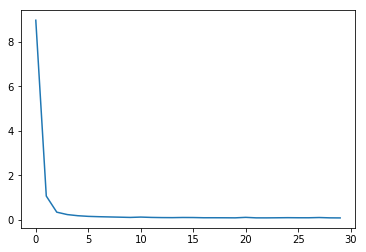

In [27]:
# Plot performance
plt.plot(hist.history['loss'])
plt.show()

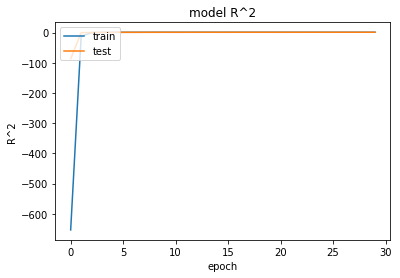

In [28]:
# plot training curve for R^2 (beware of scale, starts very low negative)
plt.plot(hist.history['r_square'])
plt.plot(hist.history['val_r_square'])
plt.title('model R^2')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [29]:
np.max(hist.history['r_square'])

0.9267946693486783

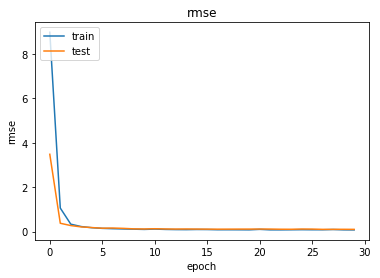

In [30]:
# plot training curve for rmse
plt.plot(hist.history['rmse'])
plt.plot(hist.history['val_rmse'])
plt.title('rmse')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [31]:
# get predictions
y_pred = model_s1.predict(X_test)
y_pred[:5],y_test[:5]

(array([[12.058907 ],
        [11.939035 ],
        [11.722951 ],
        [11.785115 ],
        [11.3377905]], dtype=float32),       SalePrice
 497   12.122691
 1261  12.106252
 411   11.884489
 1046  11.652687
 1033  11.338572)

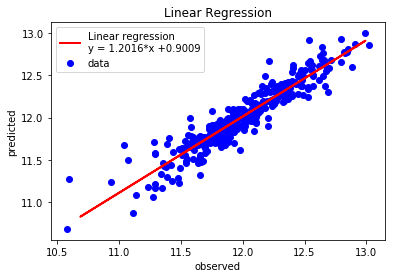

In [32]:
# print the linear regression and display datapoints
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
true_y=y_test  # np.argmax(y_test, axis=1)  # decode one-hot encoding
regressor.fit(true_y, y_pred)  
y_fit = regressor.predict(y_pred) 

reg_intercept = round(regressor.intercept_[0],4)
reg_coef = round(regressor.coef_.flatten()[0],4)
reg_label = "y = " + str(reg_intercept) + "*x +" + str(reg_coef)

plt.scatter(true_y, y_pred, color='blue', label= 'data')
plt.plot(y_pred, y_fit, color='red', linewidth=2, label = 'Linear regression\n'+reg_label) 
plt.title('Linear Regression')
plt.legend()
plt.xlabel('observed')
plt.ylabel('predicted')
plt.show()

***

### Big model: model_x

In [33]:
data_X=input_X
data_y=label_df  #label_df   # input_y 와의 차이는???
data_X.shape, data_y.shape

((1456, 403), (1456, 1))

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1092, 403), (364, 403), (1092, 1), (364, 1))

In [35]:
#create model with larger capacity
model_x = Sequential()

#get number of columns in training data
n_cols = X_train.shape[1]
print(n_cols)
#add layers to model
model_x.add(Dense(200, activation='relu', input_shape=(n_cols,)))
model_x.add(Dense(100, activation='relu'))
model_x.add(Dense(20, activation='relu'))
model_x.add(Dense(1, activation='relu'))

403


In [36]:
model_x.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 200)               80800     
_________________________________________________________________
dense_8 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_9 (Dense)              (None, 20)                2020      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 21        
Total params: 102,941
Trainable params: 102,941
Non-trainable params: 0
_________________________________________________________________


In [37]:
import keras
# from keras.models import Sequential
# from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.callbacks import ModelCheckpoint

In [38]:
# compile model using accuracy to measure model performance
opt = keras.optimizers.Adam(lr=0.0015, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model_x.compile(optimizer=opt, loss='mse', metrics=['mae', 'mse', r_square])  # loss='mse' or mse
# metrics=[r_square, rmse]

In [39]:
#Fitting the ANN to the training set
from keras.callbacks import EarlyStopping
# set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(monitor = 'val_loss', patience=1000)

class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('') # linefeed
    print('.', end='')
    
model_filepath = 'min_vl_model_x403.h5'
checkpoint = ModelCheckpoint(model_filepath, verbose=0, save_best_only = True, mode='min' )
# model.fit(X_train,y_train, validation_split=0.07, batch_size=32, epochs=3000, callbacks=[checkpoint,early_stopping_monitor])
# model.load_weights(model_filepath)

In [40]:
# train model
hist = model_x.fit(X_train, y_train, epochs=3000, verbose=0, 
                   validation_data=(X_test, y_test), 
                   callbacks=[checkpoint,early_stopping_monitor, PrintDot()])  # validation_split=0.2
model_x.load_weights(model_filepath)


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [41]:
# Epoch 01793: val_loss did not improve from 18274.00347
# Epoch 02021: val_loss did not improve from 18670.11405
# Epoch 02519: val_loss did not improve from 17046.44754 # model_b2
# Epoch 02047: val_loss did not improve from 17102.42548 # model_b3
# Epoch 01658: val_loss did not improve from 19424.92891 # model_b4
# Epoch 01880: val_loss did not improve from 18291.09669 # model_b5
# Epoch 01222: val_loss did not improve from 0.15854  # model_x81

In [42]:
model_filepath

'min_vl_model_x403.h5'

***

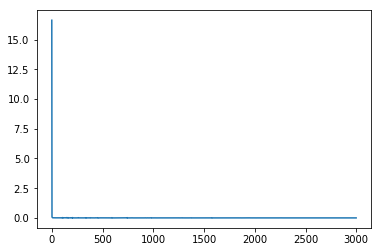

In [43]:
# Plot performance
plt.plot(hist.history['loss'])
plt.show()

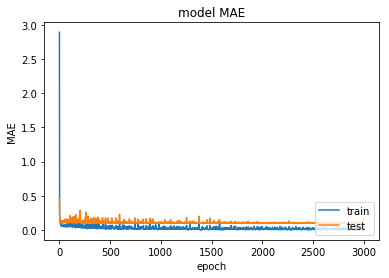

In [44]:
# plot training curve for MAE
plt.plot(hist.history['mean_absolute_error'])
plt.plot(hist.history['val_mean_absolute_error'])
plt.title('model MAE')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

In [45]:
# # plot training curve for rmse
# plt.plot(hist.history['rmse'])
# plt.plot(hist.history['val_rmse'])
# plt.title('rmse')
# plt.ylabel('rmse')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

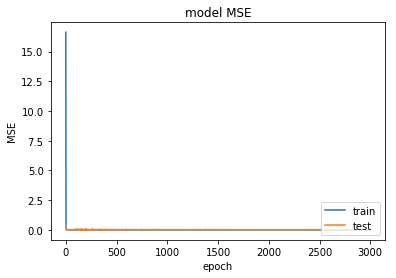

In [46]:
# plot training curve for MSE
plt.plot(hist.history['mean_squared_error'])
plt.plot(hist.history['val_mean_squared_error'])
plt.title('model MSE')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

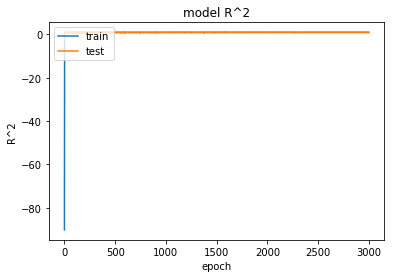

In [47]:
# plot training curve for R^2 (beware of scale, starts very low negative)
plt.plot(hist.history['r_square'])
plt.plot(hist.history['val_r_square'])
plt.title('model R^2')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [48]:
np.max(hist.history['r_square'])

0.9998932520111838

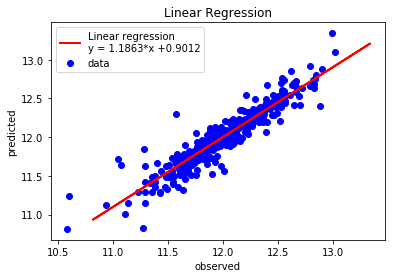

In [49]:
y_pred = model_x.predict(X_test)
# print the linear regression and display datapoints
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
true_y=y_test  # np.argmax(y_test, axis=1)  # decode one-hot encoding
regressor.fit(true_y, y_pred)  
y_fit = regressor.predict(y_pred) 

reg_intercept = round(regressor.intercept_[0],4)
reg_coef = round(regressor.coef_.flatten()[0],4)
reg_label = "y = " + str(reg_intercept) + "*x +" + str(reg_coef)

plt.scatter(true_y, y_pred, color='blue', label= 'data')
plt.plot(y_pred, y_fit, color='red', linewidth=2, label = 'Linear regression\n'+reg_label) 
plt.title('Linear Regression')
plt.legend()
plt.xlabel('observed')
plt.ylabel('predicted')
plt.show()

***

### Make predictions on test_X

Finally, predict SalePrice values using data in the testing set:

In [50]:
y_pred_s = np.exp(model_s1.predict(test_X))
y_pred_x = np.exp(model_x.predict(test_X))

In [51]:
y_pred_s.shape,y_pred_x.shape

((1459, 1), (1459, 1))

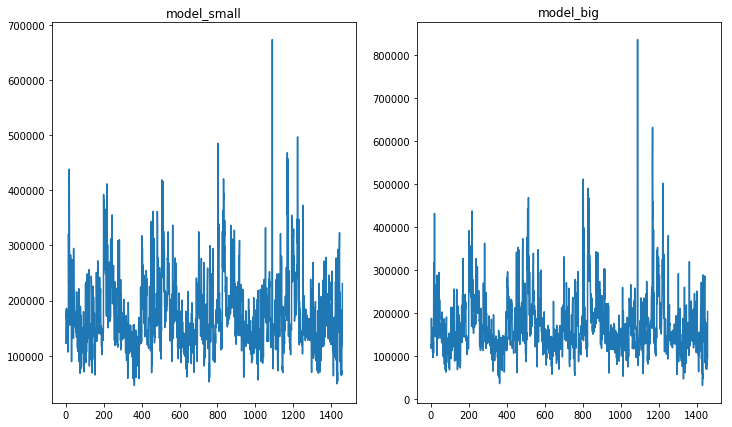

In [52]:
fig = plt.figure(figsize=(12,7))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot(y_pred_s)
ax2.plot(y_pred_x)
ax1.set_title('model_small')
ax2.set_title('model_big')

plt.show()

In [53]:
ids=np.arange(1461,2920)[:,np.newaxis]
ids, ids.size

(array([[1461],
        [1462],
        [1463],
        ...,
        [2917],
        [2918],
        [2919]]), 1459)

In [54]:
y_pred1 = pd.DataFrame(y_pred_s)
y_pred1["Id"] = ids

In [55]:
y_pred1 = y_pred1.rename(columns={0: "SalePrice"})
y_pred1 = y_pred1[["Id","SalePrice"]]
y_pred1.to_csv("data/RD_submission_XLS_minmax_s.csv", index=False)

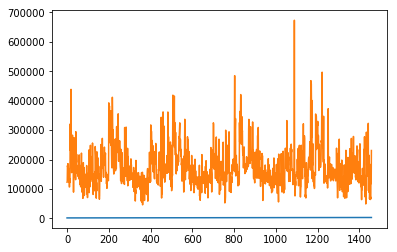

In [56]:
plt.plot(y_pred1) # b4


In [57]:
y_pred2 = pd.DataFrame(y_pred_x)
y_pred2["Id"] = ids

In [58]:
y_pred2 = y_pred2.rename(columns={0: "SalePrice"})
y_pred2 = y_pred2[["Id","SalePrice"]]
y_pred2.to_csv("data/RD_submission_XLS_minmax_x.csv", index=False)

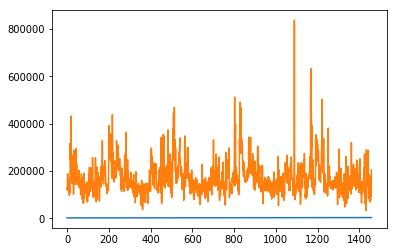

In [59]:
plt.plot(y_pred2) # b4

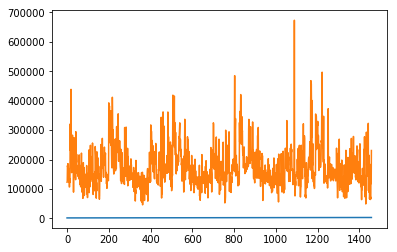

In [60]:
plt.plot(y_pred1)  # b3

***

In [ ]:
### result in Kaggle contest, 190108

> s_model: Your submission scored 0.15395, which is not an improvement of your best score. Keep trying!

> x_model: Your submission scored 0.16708, which is not an improvement of your best score. Keep trying!